In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import time
import requests
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
cities = []

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        
        cities.append(city)
        
len(cities)

613

In [8]:
city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

# Counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    # Group cities for logging purposes
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city
    city_url = url + '&q=' + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | arraias
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | meridian
Processing Record 9 of Set 1 | zhigansk
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | puerto el triunfo
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | tommot
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | calamar
Processing Record 22 of Set 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.9266,125.4092,59.68,92,91,0.40,TL,2022-11-29 20:51:51
1,Padang,-0.9492,100.3543,76.68,88,96,2.64,ID,2022-11-29 20:51:52
2,Castro,-24.7911,-50.0119,62.56,89,88,7.00,BR,2022-11-29 20:51:52
3,Arraias,-12.9288,-46.9437,70.47,93,99,4.76,BR,2022-11-29 20:51:52
4,Ushuaia,-54.8000,-68.3000,51.42,61,75,23.02,AR,2022-11-29 20:51:53
5,Meridian,43.6121,-116.3915,35.71,58,75,5.99,US,2022-11-29 20:51:34
6,Zhigansk,66.7697,123.3711,-43.35,99,57,3.85,RU,2022-11-29 20:51:53
7,Nikolskoye,59.7035,30.7861,28.29,92,100,5.10,RU,2022-11-29 20:51:53
8,Puerto El Triunfo,13.2833,-88.5500,83.08,66,100,6.24,SV,2022-11-29 20:51:54
9,Nanortalik,60.1432,-45.2371,32.58,90,100,13.56,GL,2022-11-29 20:51:54


In [10]:
new_cols = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_cols]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2022-11-29 20:51:51,-8.9266,125.4092,59.68,92,91,0.40
1,Padang,ID,2022-11-29 20:51:52,-0.9492,100.3543,76.68,88,96,2.64
2,Castro,BR,2022-11-29 20:51:52,-24.7911,-50.0119,62.56,89,88,7.00
3,Arraias,BR,2022-11-29 20:51:52,-12.9288,-46.9437,70.47,93,99,4.76
4,Ushuaia,AR,2022-11-29 20:51:53,-54.8000,-68.3000,51.42,61,75,23.02
5,Meridian,US,2022-11-29 20:51:34,43.6121,-116.3915,35.71,58,75,5.99
6,Zhigansk,RU,2022-11-29 20:51:53,66.7697,123.3711,-43.35,99,57,3.85
7,Nikolskoye,RU,2022-11-29 20:51:53,59.7035,30.7861,28.29,92,100,5.10
8,Puerto El Triunfo,SV,2022-11-29 20:51:54,13.2833,-88.5500,83.08,66,100,6.24
9,Nanortalik,GL,2022-11-29 20:51:54,60.1432,-45.2371,32.58,90,100,13.56


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1669756135.9451287

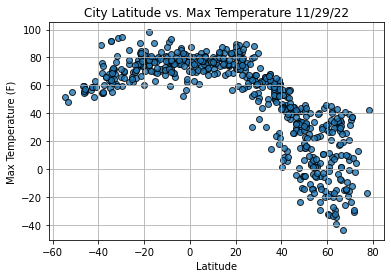

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

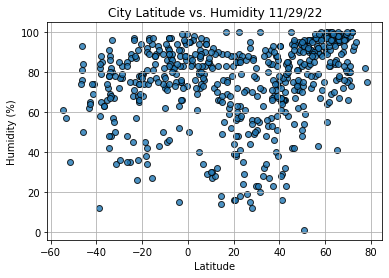

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

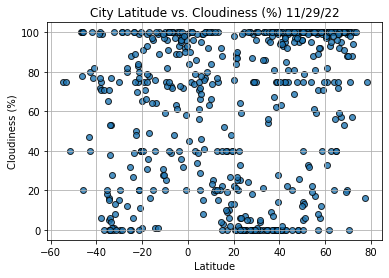

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

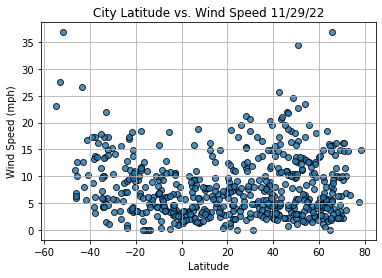

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()